In [1]:
% matplotlib inline
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.constraints import maxnorm
# from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rfc

np.random.seed(1)
import sklearn as sk

In [2]:
import xgboost

In [3]:
from sklearn.ensemble import ExtraTreesClassifier as etc

In [4]:
x = pd.read_csv("tal.csv")

In [5]:
len(x.columns)

66

In [6]:
len(x)

188

In [7]:
x.describe().columns

Index(['Requirement Cnt', 'Exclusion Cnt', 'Age', 'Bmi', 'Tobacco Qty',
       'Smokedanothersubstance', 'Smokedcigarsorpipe', 'Smokerstatus',
       'Iponcontract', 'Abooncontract', 'Businessinsuranceoption',
       'Disabilityplusoption', 'Retirementprotectionoption', 'Alcohol Status',
       'Occupationhazardousduties', 'Replacingexistingpolicyother',
       'Replacingexistingpolicy', 'Smokedcigarettes', 'Incomereduction',
       'Handoverteleuw', 'Hasvolatileincome', 'Childcioncontract',
       'Bexoncontract', 'Totalassetsamount', 'Totalliabilitiesamount',
       'Assetslessliabilitiesamount', 'Assetsandliabilitiesskipped',
       'Handedoverti', 'Uwstatus Id', 'Smokedinlast12Months',
       'Morethan25Drinksweekly', 'Industrycode', 'Lifeoncontract',
       'Cioncontract', 'Tpdoncontract', 'LIFE KEY ANON (underwriting.csv)'],
      dtype='object')

In [8]:
x.describe(include=['O']).columns

Index(['Claimant Sex', 'Occupation', 'Claim Type', 'Claim SubType',
       'Claim Status', 'Claim SubStatus', 'Cause Code', 'Cause Category',
       'Nature Of Claim', 'Primary Cause', 'Date Liability', 'Date Notified',
       'Date Received', 'Date Incident', 'Sum Insured', 'Suicide Indicator',
       'Life Key Anon', 'Dob Anon', 'Policy Key Anon',
       'Commencement Date Anon', 'Annualincome', 'Occupationname',
       'Maritalstatus', 'Purposeofcover', 'Currentannualincome',
       'Incomeearningcode', 'Gender Text', 'DOB ANON (underwriting.csv)',
       'POLICY KEY ANON (underwriting.csv)',
       'COMMENCEMENT DATE ANON (underwriting.csv)'],
      dtype='object')

In [9]:
x.pop('Date Liability')
x.pop('Date Notified')
x.pop('Date Received')
x.pop('Date Incident')
x.pop('Gender Text')

0      Female
1      Female
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17       Male
18       Male
19       Male
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29       Male
        ...  
158    Female
159      Male
160      Male
161      Male
162      Male
163      Male
164      Male
165      Male
166      Male
167      Male
168      Male
169      Male
170    Female
171    Female
172    Female
173    Female
174    Female
175    Female
176    Female
177    Female
178    Female
179    Female
180    Female
181    Female
182    Female
183    Female
184    Female
185      Male
186      Male
187      Male
Name: Gender Text, dtype: object

In [10]:
x.pop('Claim Type')
x.pop('Claim SubType')
x.pop('Claim Status')
x.pop('Claim SubStatus')
x.pop('Cause Code')
x.pop('Cause Category')
x.pop('Nature Of Claim')
x.pop('Primary Cause')
x.pop('Life Key Anon')
x.pop('Policy Key Anon')
x.pop('DOB ANON (underwriting.csv)')
x.pop('POLICY KEY ANON (underwriting.csv)')
x.pop('LIFE KEY ANON (underwriting.csv)')
x.pop('Dob Anon')
x.pop('COMMENCEMENT DATE ANON (underwriting.csv)')
x.pop('Commencement Date Anon')

0       1/06/2011
1       1/06/2011
2      13/06/2011
3      13/06/2011
4      13/06/2011
5      13/12/2011
6       9/06/1999
7       9/06/1999
8      11/04/2001
9      11/04/2001
10     11/04/2001
11     23/12/2011
12     23/12/2011
13     23/12/2011
14     22/11/2011
15     10/12/2011
16     10/12/2011
17     15/12/2011
18     15/12/2011
19     15/12/2011
20     15/12/2011
21     15/12/2011
22     15/12/2011
23     15/12/2011
24     14/02/2012
25      1/04/2012
26      1/04/2012
27      1/04/2012
28     23/04/2012
29      2/06/2012
          ...    
158    19/02/2014
159     3/03/2014
160     3/07/2014
161     3/07/2014
162     3/07/2014
163     3/07/2014
164     3/07/2014
165     3/07/2014
166     3/07/2014
167     3/07/2014
168     3/07/2014
169    11/08/2014
170    18/09/2014
171    18/09/2014
172    18/09/2014
173    18/09/2014
174    18/09/2014
175    18/09/2014
176    22/12/2014
177    22/12/2014
178    22/12/2014
179    22/12/2014
180    22/12/2014
181    22/12/2014
182    22/

In [11]:
x.pop('Sum Insured')

0        603,824
1        603,824
2        331,329
3        314,262
4        326,451
5      2,300,123
6        743,363
7        743,363
8      1,223,772
9      1,223,772
10     1,223,772
11     1,212,749
12     1,212,749
13     1,212,749
14       344,368
15       109,563
16       109,563
17     1,111,015
18     1,111,015
19     1,111,015
20     1,111,015
21     1,111,015
22     1,111,015
23     1,111,015
24     1,102,209
25       322,183
26       322,183
27       322,183
28        48,641
29        42,337
         ...    
158      199,674
159      546,615
160      357,751
161      379,596
162      359,467
163      357,751
164      379,596
165      359,467
166      357,751
167      379,596
168      359,467
169      327,260
170      524,733
171      501,571
172      485,652
173      524,733
174      501,571
175      485,652
176      629,695
177      660,888
178      668,146
179      629,695
180      660,888
181      668,146
182      629,695
183      660,888
184      668,146
185    1,031,6

In [12]:
x.describe(include=['O'])

,Claimant Sex,Occupation,Suicide Indicator,Annualincome,Occupationname,Maritalstatus,Purposeofcover,Currentannualincome,Incomeearningcode
count,188,188,188,188,188,188,188,188,188
unique,2,38,3,38,41,2,4,97,4
top,Male,Business Consultant,N,0,Business Analyst,Single,Personal,0,Income earning
freq,123,30,89,114,33,174,154,20,184


In [13]:
# x['Sum Insured']=x['Sum Insured'].apply(lambda fx: fx.replace(',', ''))
# x['Sum Insured']=x['Sum Insured'].astype(int)

In [14]:
s = x['Suicide Indicator']

In [15]:
s[0] #N
s[2] #YD
s[184] #YA

'YA'

In [16]:
for col in x.describe(include=['O']).columns:
    x[col] = x[col].astype('category')
columns = x.select_dtypes(['category']).columns
x[columns] = x[columns].apply(lambda fx: fx.cat.codes)

In [17]:
x['Suicide Indicator'][0] #N = 0
x['Suicide Indicator'][2] #YD = 2
x['Suicide Indicator'][184] #YA = 1

1

In [18]:
y = x.pop('Suicide Indicator')

1.0
0.9894


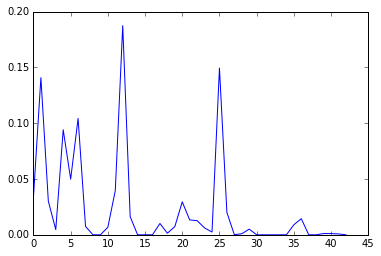

In [19]:
## Build the model:
model = rfc(n_estimators=2000,min_samples_split=1, min_samples_leaf=1, 
                max_features='auto', max_leaf_nodes=None, 
                oob_score=True, n_jobs=-1, random_state=1)
model.fit(x,y)

## Print scores:
print(model.score(x,y))

## Plot the feature importances:
plt.plot(model.feature_importances_)

## Print out the Out Of Bag Accuracy:
print("%.4f" % model.oob_score_)

1.0
0.9947


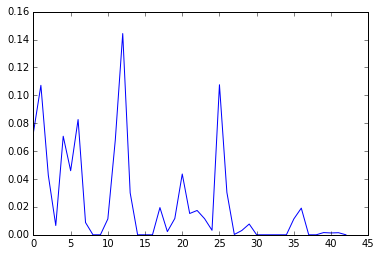

In [20]:
model_e = etc(n_estimators=2000, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                               max_leaf_nodes=None, bootstrap=True, 
                               oob_score=True, n_jobs=-1, random_state=None, verbose=0, warm_start=False,
                               class_weight=None)
model_e.fit(x,y)

## Print scores:
print(model_e.score(x,y))

## Plot the feature importances:
plt.plot(model_e.feature_importances_)

## Print out the Out Of Bag Accuracy:
print("%.4f" % model_e.oob_score_)

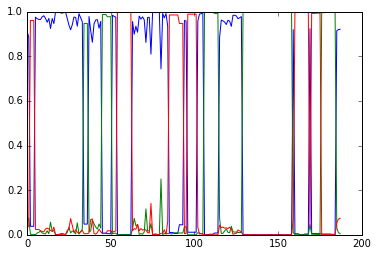

In [21]:
plt.plot(model_e.predict_proba(x))

In [22]:
sk.metrics.confusion_matrix(y, model.predict(x))

array([[89,  0,  0],
       [ 0, 57,  0],
       [ 0,  0, 42]])

Feature ranking:
1. feature 12 (0.144270)
2. feature 25 (0.107577)
3. feature 1 (0.107142)
4. feature 6 (0.082630)
5. feature 0 (0.073455)
6. feature 4 (0.070656)
7. feature 11 (0.067908)
8. feature 5 (0.045943)
9. feature 20 (0.043577)
10. feature 2 (0.042593)
11. feature 26 (0.030391)
12. feature 13 (0.030082)
13. feature 17 (0.019518)
14. feature 36 (0.019124)
15. feature 22 (0.017444)
16. feature 21 (0.015275)
17. feature 19 (0.011688)
18. feature 23 (0.011563)
19. feature 35 (0.011388)
20. feature 10 (0.011372)
21. feature 7 (0.008798)
22. feature 29 (0.007721)
23. feature 3 (0.006652)
24. feature 24 (0.003223)
25. feature 28 (0.003060)
26. feature 18 (0.002276)
27. feature 39 (0.001591)
28. feature 41 (0.001506)
29. feature 40 (0.001328)
30. feature 27 (0.000248)
31. feature 38 (0.000000)
32. feature 37 (0.000000)
33. feature 8 (0.000000)
34. feature 32 (0.000000)
35. feature 9 (0.000000)
36. feature 34 (0.000000)
37. feature 33 (0.000000)
38. feature 14 (0.000000)
39. feature 15

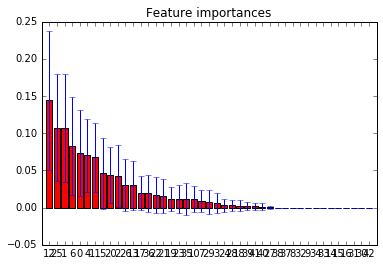

In [23]:
importances = model_e.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_e.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [24]:
indices_use = indices

In [25]:
for pq in indices_use:
    print(x.columns[pq])

Occupationname
Currentannualincome
Occupation
Bmi
Claimant Sex
Age
Iponcontract
Annualincome
Purposeofcover
Requirement Cnt
Handoverteleuw
Abooncontract
Maritalstatus
Uwstatus Id
Replacingexistingpolicy
Replacingexistingpolicyother
Occupationhazardousduties
Smokedcigarettes
Handedoverti
Smokerstatus
Tobacco Qty
Childcioncontract
Exclusion Cnt
Incomereduction
Incomeearningcode
Alcohol Status
Industrycode
Cioncontract
Lifeoncontract
Hasvolatileincome
Morethan25Drinksweekly
Smokedinlast12Months
Smokedanothersubstance
Totalliabilitiesamount
Smokedcigarsorpipe
Assetsandliabilitiesskipped
Assetslessliabilitiesamount
Businessinsuranceoption
Disabilityplusoption
Retirementprotectionoption
Totalassetsamount
Bexoncontract
Tpdoncontract


In [26]:
from sklearn.feature_selection import SelectFromModel
model_imp = SelectFromModel(model_e, prefit=True)
feature_idx = model_imp.get_support()
feature_name = x.columns[feature_idx]

first_ten = feature_name[0:6]

In [27]:
x_new = model_imp.transform(x)

1.0
0.9947


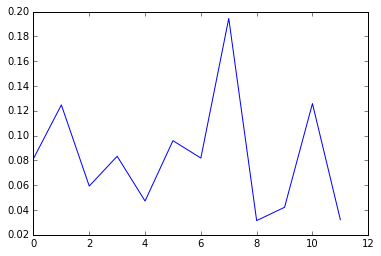

In [28]:
model_e_2 = etc(n_estimators=2000, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                               max_leaf_nodes=None, bootstrap=True, 
                               oob_score=True, n_jobs=-1, random_state=None, verbose=0, warm_start=False,
                               class_weight=None)
model_e_2.fit(x_new,y)

## Print scores:
print(model_e_2.score(x_new,y))

## Plot the feature importances:
plt.plot(model_e_2.feature_importances_)

## Print out the Out Of Bag Accuracy:
print("%.4f" % model_e_2.oob_score_)

Feature ranking:
1. feature 7 (0.194496)
2. feature 10 (0.125837)
3. feature 1 (0.124750)
4. feature 5 (0.095913)
5. feature 3 (0.083347)
6. feature 6 (0.081895)
7. feature 0 (0.081399)
8. feature 2 (0.059296)
9. feature 4 (0.047237)
10. feature 9 (0.042173)
11. feature 11 (0.032199)
12. feature 8 (0.031456)


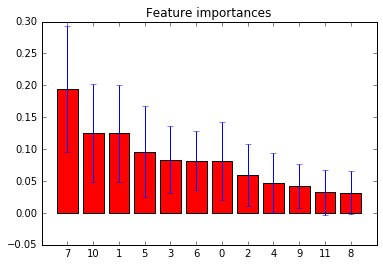

In [29]:
importances = model_e_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_e_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_new.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_new.shape[1]), indices)
plt.xlim([-1, x_new.shape[1]])
plt.show()

In [30]:
changed = x[first_ten]

1.0
0.9734


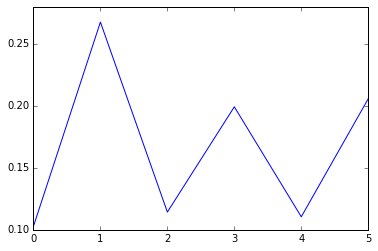

In [31]:
model_e_3 = etc(n_estimators=2000, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                               max_leaf_nodes=None, bootstrap=True, 
                               oob_score=True, n_jobs=-1, random_state=None, verbose=0, warm_start=False,
                               class_weight=None)
model_e_3.fit(changed,y)

## Print scores:
print(model_e_3.score(changed,y))

## Plot the feature importances:
plt.plot(model_e_3.feature_importances_)

## Print out the Out Of Bag Accuracy:
print("%.4f" % model_e_3.oob_score_)

(array([ 89.,   0.,   0.,   0.,   0.,  57.,   0.,   0.,   0.,  42.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

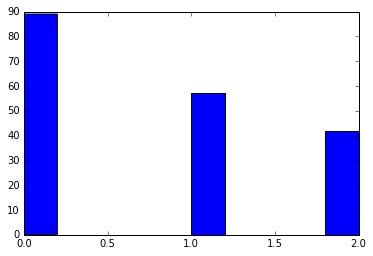

In [32]:
plt.hist(y)

In [33]:
changed['Suicide'] = y

/home/daniel/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
changed.columns

Index(['Claimant Sex', 'Occupation', 'Requirement Cnt', 'Age', 'Annualincome',
       'Bmi', 'Suicide'],
      dtype='object')

In [35]:
changed.columns = ['Gender', 'Occupation', 'Requirement_Cnt', 'Age', 'Annualincome',
       'Bmi', 'Suicide']

In [36]:
changed.to_csv("Subset.csv",sep=',',index=False)

In [37]:
x_bin = pd.read_csv("binary.csv")

In [38]:
y_bin = x_bin.pop('Suicide Indicator (group)')

In [39]:
model = xgboost.XGBClassifier(learning_rate = 1, n_estimators = 100)
model.fit(x_bin, y_bin)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

[ 0.02811245  0.          0.2811245   0.08032128  0.00401606  0.          0.
  0.          0.          0.          0.54216868  0.          0.
  0.00803213  0.          0.          0.          0.          0.          0.
  0.          0.00401606  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.01606426  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00803213  0.
  0.00401606  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.02409638  0.        ]


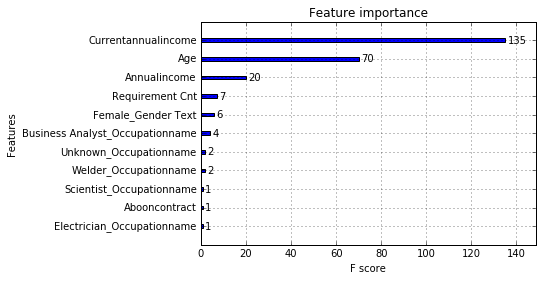

In [40]:
print(model.feature_importances_)

xgboost.plot_importance(model)

[ 0.          0.1858108   0.          0.          0.19594595  0.01689189
  0.06418919  0.00337838  0.          0.          0.          0.05405406
  0.24662162  0.          0.          0.          0.          0.          0.
  0.00337838  0.01351351  0.          0.          0.          0.
  0.20945945  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00675676  0.          0.
  0.          0.          0.          0.        ]


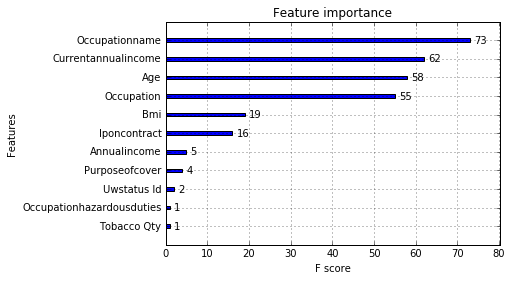

In [41]:
model = xgboost.XGBClassifier(learning_rate = 1, n_estimators = 100)
model.fit(x, y)

print(model.feature_importances_)

xgboost.plot_importance(model)

In [42]:
# before_data = x
# before_data['Suicide'] = y

In [43]:
x.pop('Occupation')

0       0
1       0
2      23
3      23
4      23
5      14
6      25
7      25
8       0
9       0
10      0
11     16
12     16
13     16
14     31
15     13
16     13
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24     19
25      3
26      3
27      3
28     34
29     18
       ..
158     6
159    10
160    11
161    11
162    11
163    11
164    11
165    11
166    11
167    11
168    11
169    30
170    27
171    27
172    27
173    27
174    27
175    27
176    21
177    21
178    21
179    21
180    21
181    21
182    21
183    21
184    21
185     5
186    15
187    15
Name: Occupation, dtype: int8

In [44]:
# before_data.to_csv("Before.csv",sep=',',index=False)

In [45]:
validate = pd.read_csv("validation.csv")

In [46]:
validate.columns

Index(['Life Key Anon',
       'MAX((Commencement Date Anon))-MIN((Commencement Date Anon))',
       'Requirement Cnt', 'Exclusion Cnt', 'Age', 'Annualincome', 'Bmi',
       'Tobacco Qty', 'Smokedanothersubstance', 'Smokedcigarsorpipe',
       'Smokerstatus', 'Iponcontract', 'Occupationname', 'Abooncontract',
       'Businessinsuranceoption', 'Disabilityplusoption',
       'Retirementprotectionoption', 'Maritalstatus', 'Alcohol Status',
       'Occupationhazardousduties', 'Purposeofcover',
       'Replacingexistingpolicyother', 'Replacingexistingpolicy',
       'Smokedcigarettes', 'Incomereduction', 'Currentannualincome',
       'Handoverteleuw', 'Hasvolatileincome', 'Incomeearningcode',
       'Childcioncontract', 'Bexoncontract', 'Totalassetsamount',
       'Totalliabilitiesamount', 'Assetslessliabilitiesamount',
       'Assetsandliabilitiesskipped', 'Handedoverti', 'Uwstatus Id',
       'Smokedinlast12Months', 'Morethan25Drinksweekly', 'Industrycode',
       'Lifeoncontract', 'Cionc

In [47]:
all_v = validate[validate.columns-validate.columns[44:-1]]

/home/daniel/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [48]:
all_v.pop('Unnamed: 92')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
489   NaN
490   NaN
491   NaN
492   NaN
493   NaN
494   NaN
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
500   NaN
501   NaN
502   NaN
503   NaN
504   NaN
505   NaN
506   NaN
507   NaN
508   NaN
509   NaN
510   NaN
511   NaN
512   NaN
513   NaN
514   NaN
515   NaN
516   NaN
517   NaN
518   NaN
Name: Unnamed: 92, dtype: float64

In [49]:
tal = pd.read_csv("tal.csv")

In [50]:
part_1 = tal[['Gender Text', 'Requirement Cnt', 'Exclusion Cnt', 'Age',
       'Annualincome', 'Bmi', 'Tobacco Qty', 'Smokedanothersubstance',
       'Smokedcigarsorpipe', 'Smokerstatus', 'Iponcontract', 'Occupationname',
       'Abooncontract', 'Businessinsuranceoption', 'Disabilityplusoption',
       'Retirementprotectionoption', 'Maritalstatus', 'Alcohol Status',
       'Occupationhazardousduties', 'Purposeofcover',
       'Replacingexistingpolicyother', 'Replacingexistingpolicy',
       'Smokedcigarettes', 'Incomereduction', 'Currentannualincome',
       'Handoverteleuw', 'Hasvolatileincome', 'Incomeearningcode',
       'Childcioncontract', 'Bexoncontract', 'Totalassetsamount',
       'Totalliabilitiesamount', 'Assetslessliabilitiesamount',
       'Assetsandliabilitiesskipped', 'Handedoverti', 'Uwstatus Id',
       'Smokedinlast12Months', 'Morethan25Drinksweekly', 'Industrycode',
       'Lifeoncontract', 'Cioncontract', 'Tpdoncontract']]

In [51]:
part_2 = all_v[['Gender Text', 'Requirement Cnt', 'Exclusion Cnt', 'Age',
       'Annualincome', 'Bmi', 'Tobacco Qty', 'Smokedanothersubstance',
       'Smokedcigarsorpipe', 'Smokerstatus', 'Iponcontract', 'Occupationname',
       'Abooncontract', 'Businessinsuranceoption', 'Disabilityplusoption',
       'Retirementprotectionoption', 'Maritalstatus', 'Alcohol Status',
       'Occupationhazardousduties', 'Purposeofcover',
       'Replacingexistingpolicyother', 'Replacingexistingpolicy',
       'Smokedcigarettes', 'Incomereduction', 'Currentannualincome',
       'Handoverteleuw', 'Hasvolatileincome', 'Incomeearningcode',
       'Childcioncontract', 'Bexoncontract', 'Totalassetsamount',
       'Totalliabilitiesamount', 'Assetslessliabilitiesamount',
       'Assetsandliabilitiesskipped', 'Handedoverti', 'Uwstatus Id',
       'Smokedinlast12Months', 'Morethan25Drinksweekly', 'Industrycode',
       'Lifeoncontract', 'Cioncontract', 'Tpdoncontract']]

In [52]:
part_all = pd.concat([part_1,part_2])

In [53]:
part_all.describe(include=['O']).columns

Index(['Gender Text', 'Annualincome', 'Smokerstatus', 'Iponcontract',
       'Occupationname', 'Abooncontract', 'Maritalstatus',
       'Occupationhazardousduties', 'Purposeofcover', 'Currentannualincome',
       'Incomeearningcode', 'Totalassetsamount', 'Totalliabilitiesamount',
       'Assetslessliabilitiesamount'],
      dtype='object')

In [54]:
for col in part_all.describe(include=['O']).columns:
    print(col)
    part_all[col] = part_all[col].astype('category')
    
columns = part_all.select_dtypes(['category']).columns
part_all[columns] = part_all[columns].apply(lambda fx: fx.cat.codes)

Gender Text
Annualincome
Smokerstatus
Iponcontract
Occupationname
Abooncontract
Maritalstatus
Occupationhazardousduties
Purposeofcover
Currentannualincome
Incomeearningcode
Totalassetsamount
Totalliabilitiesamount
Assetslessliabilitiesamount


In [55]:
train = part_all[0:188]
test = part_all[188:-1]

[ 0.          0.00288184  0.          0.19596542  0.0259366   0.12103746
  0.          0.          0.          0.          0.04610951  0.27377522
  0.          0.          0.          0.          0.00288184  0.
  0.00288184  0.00576369  0.00288184  0.          0.          0.
  0.31700289  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00288184  0.          0.
  0.          0.          0.          0.        ]


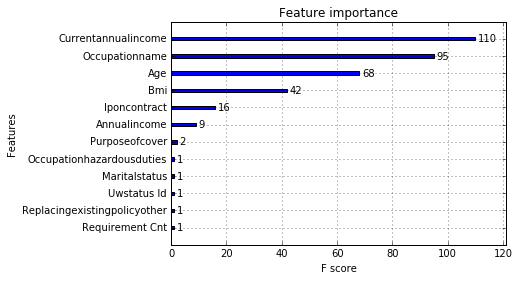

In [56]:
model_tog = xgboost.XGBClassifier(learning_rate = 1, n_estimators = 100)
model_tog.fit(train, y)

print(model_tog.feature_importances_)

xgboost.plot_importance(model_tog)

In [57]:
sum(model_tog.predict(test)==0)/len(test)

0.81081081081081086

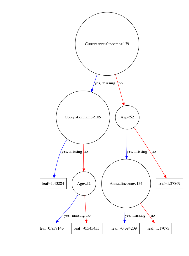

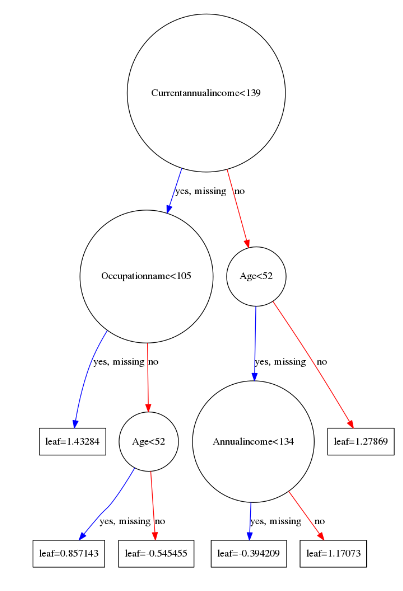

In [75]:
xgboost.plot_tree(model_tog)
fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig('diag.png')